# Quantization - introduction


In [2]:
import torch
import matplotlib.pyplot as plt

# default size of figures
plt.rcParams["figure.figsize"] = [10, 10]

Quantization is a process of representation change: from real values to discrete space.

Let's start our journey with some data representations!

First, we have **unsigned INT** representations, where we simple denote numbers with following bits (from leftmost most
significant bit (MSB) to least significant bit (LSB)).

$1011b = 1*2^3 + 0*2^2 + 1*2^1 + 1*2^0 = 8 + 0 + 2 + 1 = 11$

Then, we have signed **INT** representations, where we use MSB for sign. We most often use so called
`Complement Representation` where the first bit is negative value with maximal magnitude.

$1011b = 1 * -(2^3) + 0*2^2 + 1*2^1 + 1*2^0 = -8 + 2 + 1 = -5$

$0011b = 0 * -(2^3) + 0*2^2 + 1*2^1 + 1*2^0 = 2 + 1 = 3$

We can use this approach to represent fractions as well. We use **fixed point** representation, where first digit
represents sign (in the same metter as in INT), next couple of bits represent integer part, and remaining bits represent
fraction.

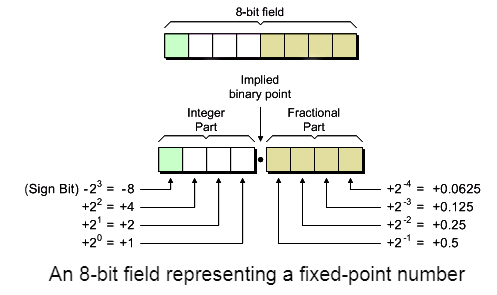

Finally, we have **floating point representations**. We'll use an IEEE-754 32-bit standard, where FP is denoted with:

- sign `S` (most significant bit - leftmost one)
- exponent `E` (following 8 bits)
- fraction `F` (remaining 23 bits)

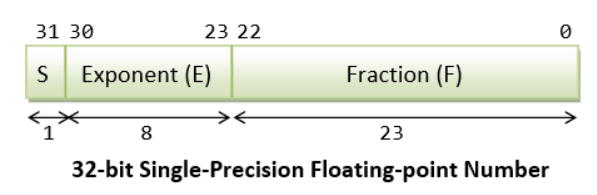

The sign tells us wheater the number is positive (0) or negative (1). The fraction can be used to represent all the
digits after the "dot" (so... the fraction!). It is normalized with leading 1, so it's `1.F` And finally, we use the
exponent to "shift" the decimal point. We use 8 bits for this part of the number, so we can get maximum value of 255. In
order to get both very big and very small numbers, we actually normalized as `E-127`

The final number we get can be described as:

$x_{FP} = (-1)^S * 1.F * 2^{E-127}$

Floating point representation has good enough precision to assume it as a real value.


For the first task, let's try out some representations!

1. Calculate the number, that can be represented as the **UINT**: `10110`

2. Calculate the number, that can be represented as the **INT**: `10110`

3. Calculate the number, that can be represented as the **fixed point** with 4 bits integer part and 4 bits fraction
   part: `1011 0100`

4. Calculate the number, that can be represented as the **floating point**: `110000001 01100000000000000000000`

Write your code clearly - implement entire equations!


In [3]:
x_uint = 0 * 2**0 + 1 * 2**1 + 1 * 2**2 + 0 * 2**3 + 1 * 2**4
x_int = 0 * 2**0 + 1 * 2**1 + 1 * 2**2 + 0 * 2**3 - 1 * 2**4
x_fixed = (1 * 2**0 + 1 * 2**1 + 0 * 2**2 - 1 * 2**3) - (0 * 2**-1 + 1 * 2**-2)
x_floating = -1 * (1 + (0 * 2**-1 + 1 * 2**-2 + 1 * 2**-3)) * 2 ** ((1 * 2**0 + 1 * 2**7)-127)
print(x_uint, x_int, x_fixed, x_floating)

22 -10 -5.25 -5.5


We have a basics ready, so let's quantize!

We'll start with something easy! Create a tensor `R1` with values from linear space of range 0 to 16 and length of 1000
elements.

Print this tensor and plot it on both axis X and Y. Add title and legend


tensor([ 0.0000,  0.0160,  0.0320,  0.0480,  0.0641,  0.0801,  0.0961,  0.1121,
         0.1281,  0.1441,  0.1602,  0.1762,  0.1922,  0.2082,  0.2242,  0.2402,
         0.2563,  0.2723,  0.2883,  0.3043,  0.3203,  0.3363,  0.3524,  0.3684,
         0.3844,  0.4004,  0.4164,  0.4324,  0.4484,  0.4645,  0.4805,  0.4965,
         0.5125,  0.5285,  0.5445,  0.5606,  0.5766,  0.5926,  0.6086,  0.6246,
         0.6406,  0.6567,  0.6727,  0.6887,  0.7047,  0.7207,  0.7367,  0.7528,
         0.7688,  0.7848,  0.8008,  0.8168,  0.8328,  0.8488,  0.8649,  0.8809,
         0.8969,  0.9129,  0.9289,  0.9449,  0.9610,  0.9770,  0.9930,  1.0090,
         1.0250,  1.0410,  1.0571,  1.0731,  1.0891,  1.1051,  1.1211,  1.1371,
         1.1532,  1.1692,  1.1852,  1.2012,  1.2172,  1.2332,  1.2492,  1.2653,
         1.2813,  1.2973,  1.3133,  1.3293,  1.3453,  1.3614,  1.3774,  1.3934,
         1.4094,  1.4254,  1.4414,  1.4575,  1.4735,  1.4895,  1.5055,  1.5215,
         1.5375,  1.5536,  1.5696,  1.58

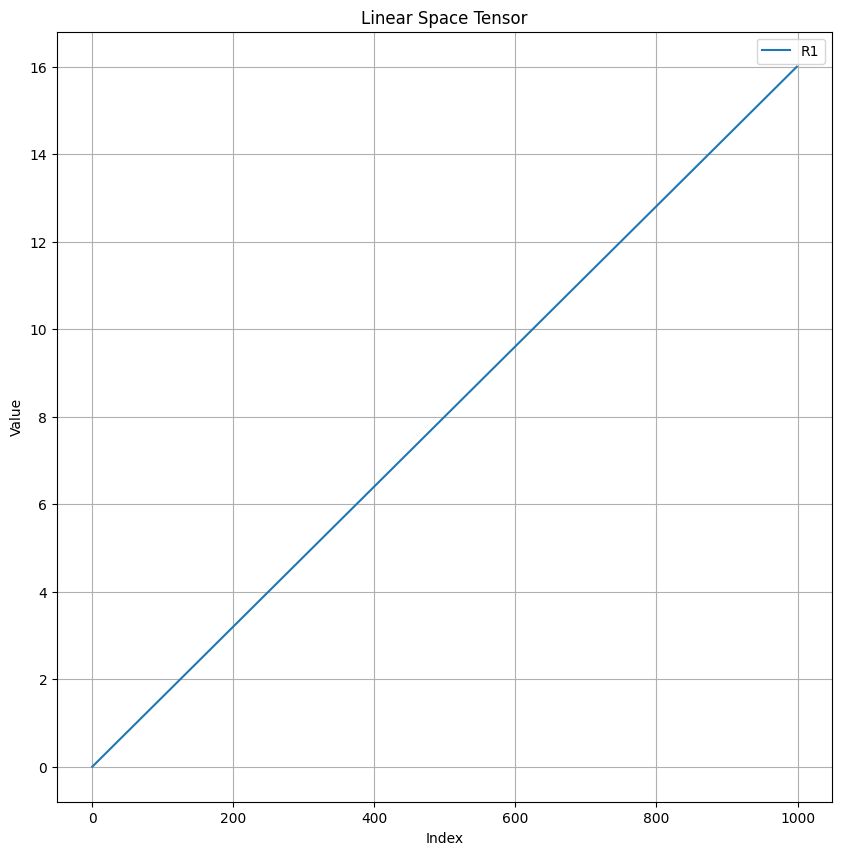

In [4]:
R1 = torch.linspace(0, 16, 1000)

print(R1)

plt.plot(R1)
plt.title("Linear Space Tensor")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(["R1"])
plt.grid(True)
plt.show()


Remember, that we use quantisation in case of embedded AI to reduce the precision of weights activations. Our goal is to
represent the same numbers with smaller number of bits! Let's represent those floating point numbers as 4bit INTs.

That's easy! Let's just round the numbers with `torch.floor()` function! That's it!

Print `R1` tensor and quantized tensor on the same plot!


R1: tensor([ 0.0000,  0.0160,  0.0320,  0.0480,  0.0641,  0.0801,  0.0961,  0.1121,
         0.1281,  0.1441,  0.1602,  0.1762,  0.1922,  0.2082,  0.2242,  0.2402,
         0.2563,  0.2723,  0.2883,  0.3043,  0.3203,  0.3363,  0.3524,  0.3684,
         0.3844,  0.4004,  0.4164,  0.4324,  0.4484,  0.4645,  0.4805,  0.4965,
         0.5125,  0.5285,  0.5445,  0.5606,  0.5766,  0.5926,  0.6086,  0.6246,
         0.6406,  0.6567,  0.6727,  0.6887,  0.7047,  0.7207,  0.7367,  0.7528,
         0.7688,  0.7848,  0.8008,  0.8168,  0.8328,  0.8488,  0.8649,  0.8809,
         0.8969,  0.9129,  0.9289,  0.9449,  0.9610,  0.9770,  0.9930,  1.0090,
         1.0250,  1.0410,  1.0571,  1.0731,  1.0891,  1.1051,  1.1211,  1.1371,
         1.1532,  1.1692,  1.1852,  1.2012,  1.2172,  1.2332,  1.2492,  1.2653,
         1.2813,  1.2973,  1.3133,  1.3293,  1.3453,  1.3614,  1.3774,  1.3934,
         1.4094,  1.4254,  1.4414,  1.4575,  1.4735,  1.4895,  1.5055,  1.5215,
         1.5375,  1.5536,  1.5696,  

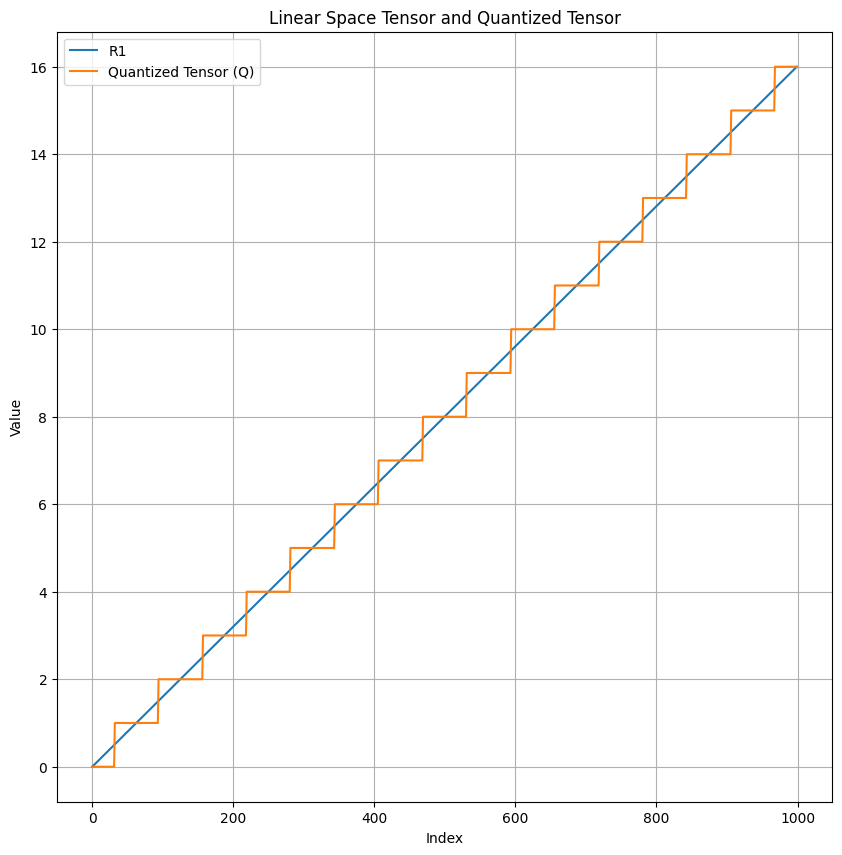

In [5]:
Q = torch.quantize_per_tensor(R1, scale=1.0, zero_point=0, dtype=torch.qint8)

print("R1:", R1)
print("Quantized Tensor (Q):", Q)

plt.plot(R1, label="R1")
plt.plot(Q.int_repr().float(), label="Quantized Tensor (Q)")
plt.title("Linear Space Tensor and Quantized Tensor")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


All right. But what if we have different ranges for our data?

Create a tensor R2 with values from linear space of range -2 to 18 and length of 1000 elements.

With 4bit INT be can not get any number smaller than 0 or bigger than $2^4-1$

Use `torch.clamp()` to limit the numbers.


R2: tensor([-2.0000e+00, -1.9800e+00, -1.9600e+00, -1.9399e+00, -1.9199e+00,
        -1.8999e+00, -1.8799e+00, -1.8599e+00, -1.8398e+00, -1.8198e+00,
        -1.7998e+00, -1.7798e+00, -1.7598e+00, -1.7397e+00, -1.7197e+00,
        -1.6997e+00, -1.6797e+00, -1.6597e+00, -1.6396e+00, -1.6196e+00,
        -1.5996e+00, -1.5796e+00, -1.5596e+00, -1.5395e+00, -1.5195e+00,
        -1.4995e+00, -1.4795e+00, -1.4595e+00, -1.4394e+00, -1.4194e+00,
        -1.3994e+00, -1.3794e+00, -1.3594e+00, -1.3393e+00, -1.3193e+00,
        -1.2993e+00, -1.2793e+00, -1.2593e+00, -1.2392e+00, -1.2192e+00,
        -1.1992e+00, -1.1792e+00, -1.1592e+00, -1.1391e+00, -1.1191e+00,
        -1.0991e+00, -1.0791e+00, -1.0591e+00, -1.0390e+00, -1.0190e+00,
        -9.9900e-01, -9.7898e-01, -9.5896e-01, -9.3894e-01, -9.1892e-01,
        -8.9890e-01, -8.7888e-01, -8.5886e-01, -8.3884e-01, -8.1882e-01,
        -7.9880e-01, -7.7878e-01, -7.5876e-01, -7.3874e-01, -7.1872e-01,
        -6.9870e-01, -6.7868e-01, -6.5866e-01, 

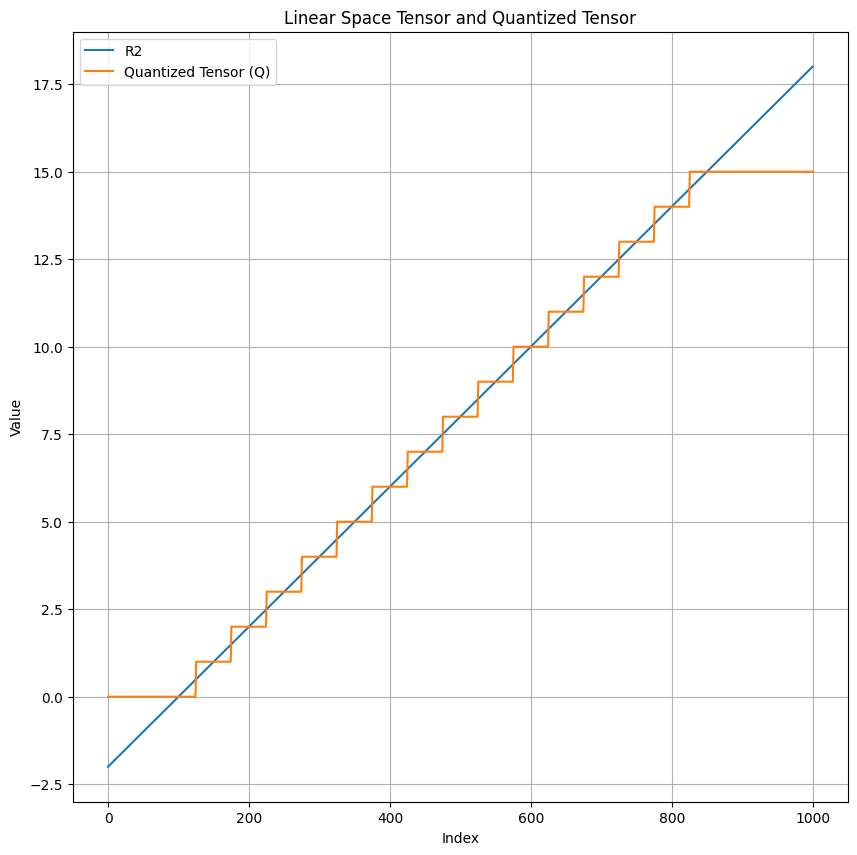

In [6]:
R2 = torch.linspace(-2, 18, 1000)
Q = torch.quantize_per_tensor(R2, scale=1.0, zero_point=0, dtype=torch.qint8)
Q = torch.clamp(Q.int_repr(), 0, 15)

print("R2:", R2)
print("Quantized Tensor (Q):", Q)

plt.plot(R2, label="R2")
plt.plot(Q.dequantize(), label="Quantized Tensor (Q)")
plt.title("Linear Space Tensor and Quantized Tensor")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


Ok... But let's say, that we want to represent the fractions as well! Let's use fixed point representation, that:

- doesn't use sign bit
- has a total of 5 bits
- uses one bit as fraction

Let's study this representation! Calculate:

- what is the biggest and smallest number, you can represent with this representation?
- Whats the `PRECISION` of this representation (distance between next fixed point numbers).
- How many numbers can we represent on this discrete space (what is the discrete space size)?

Now, in order to quantize our `R1` tensor we need to `scale` it!

The `scale` is the `PRECISION` of this representation.

Divide the `R2` with calculated `scale` before using the floor function.

Then - multiply the result of `floor` function with the same `scale` before appling `clamp`


PRECISION: 0.0625
MINIMUM VALUE: 0
MAXIMUM VALUE: 15.5
DISCRETE SPACE SIZE: 16
Quantized Tensor (Q): tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0

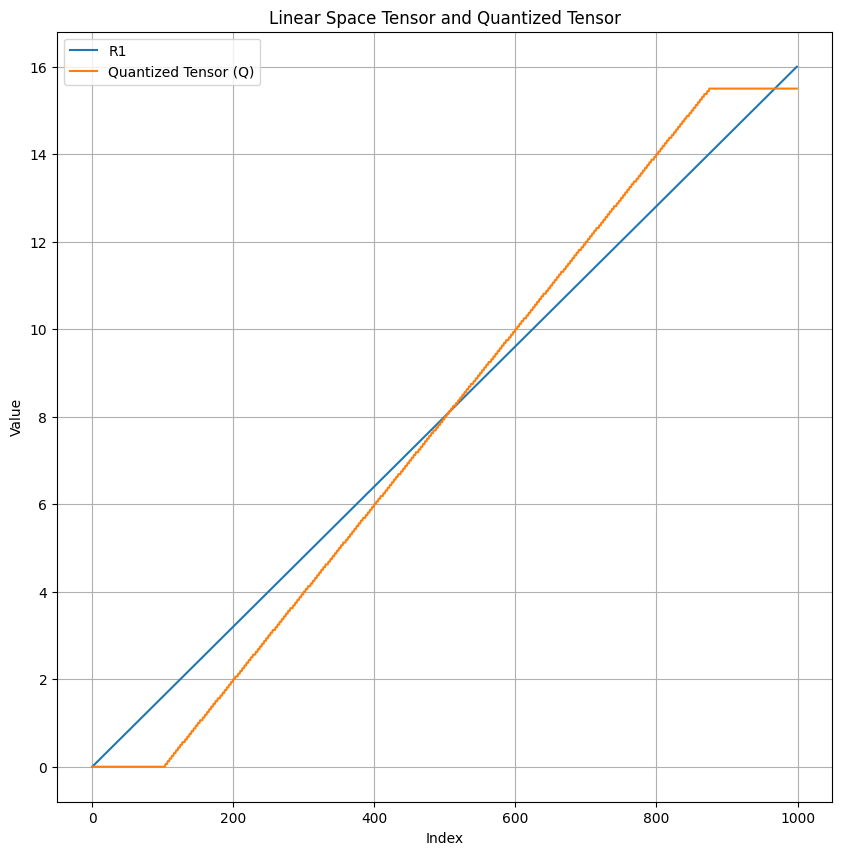

In [7]:
SIGN_BITS = 0
WIDTH_BITS = 5
FRACTION_BITS = 1
INT_BITS = WIDTH_BITS - SIGN_BITS - FRACTION_BITS

DISCRETE_SPACE_SIZE = 2 ** (WIDTH_BITS - FRACTION_BITS)
PRECISION = 1 / DISCRETE_SPACE_SIZE
MIN_VALUE = 0
MAX_VALUE = (1*2**0+1*2**1+1*2**2+1*2**3)+(1*2**-1)

print("PRECISION:", PRECISION)
print("MINIMUM VALUE:", MIN_VALUE)
print("MAXIMUM VALUE:", MAX_VALUE)
print("DISCRETE SPACE SIZE:", DISCRETE_SPACE_SIZE)

Q = torch.floor(R2 / PRECISION)
Q = torch.clamp(Q * PRECISION, MIN_VALUE, MAX_VALUE)

print("Quantized Tensor (Q):", Q)

plt.plot(R1, label="R1")
plt.plot(Q, label="Quantized Tensor (Q)")
plt.title("Linear Space Tensor and Quantized Tensor")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



For AI, most weights and activations are numbers close to 0 (both positive and negative). We would like to be able to
represent negative numbers! So let's try something harder!

Create a tensor R3 with values from linear space of range -2.5 to 2.5 and length of 1000 elements.

As our discrete space, we'll now use fixed point representation with:

- total width of 4 bits
- 1 bit sign
- point position after second bit

Note: bit of sign is one of integer bits!

Let's study this representation! Calculate:

- the number of bits used to represent the integer part and the fraction.
- what is the biggest and smallest number, you can represent with this representation?
- Whats the precision of this representation (distance between next fixed point numbers).
- How many numbers can we represent on this discrete space (what is the discrete space size)?


In [8]:
R3 = torch.linspace(-2.5, 2.5, 1000)

SIGN_BITS = 1
WIDTH_BITS = 4
FRACTION_BITS = 2
INT_BITS = 1

# 0 0 00

DISCRETE_SPACE_SIZE = 2 ** (WIDTH_BITS - FRACTION_BITS)
PRECISION = 1 / DISCRETE_SPACE_SIZE
MIN_VALUE = -2
MAX_VALUE = 1.75
print("SIGN_BITS =", SIGN_BITS)
print("WIDTH_BITS =", WIDTH_BITS)
print("FRACTION_BITS =", FRACTION_BITS)
print("INT_BITS =", INT_BITS)
print("PRECISION =", PRECISION)
print("MIN_VALUE =", MIN_VALUE)
print("MIN_VALUE =", MAX_VALUE)
print("DISCRETE_SPACE_SIZE =", DISCRETE_SPACE_SIZE)


SIGN_BITS = 1
WIDTH_BITS = 4
FRACTION_BITS = 2
INT_BITS = 1
PRECISION = 0.25
MIN_VALUE = -2
MIN_VALUE = 1.75
DISCRETE_SPACE_SIZE = 4


Try to perform quantization in the same way, as previously!

Calculate the scale, use `floor` and `clamp`!


Quantized Tensor (Q): tensor([-2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000, -2.0000,
        -2.0000, -

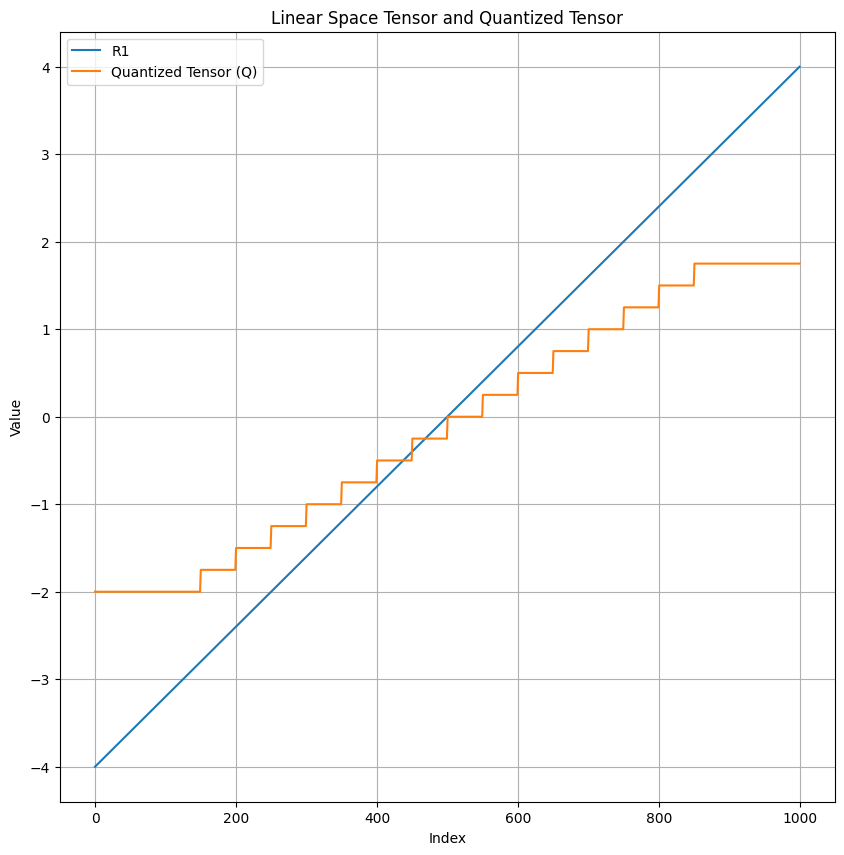

In [9]:
Q = torch.floor(R3 / PRECISION)
Q = torch.clamp(Q * PRECISION, MIN_VALUE, MAX_VALUE)

print("Quantized Tensor (Q):", Q)

R1 = torch.linspace(-4, 4, 1000)
plt.plot(R1, label="R1")
plt.plot(Q, label="Quantized Tensor (Q)")
plt.title("Linear Space Tensor and Quantized Tensor")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


Based on the described algorytm, define a function `fixed_point_quantize`.

Function should takes arguments:

- `R` - floating point tensor, which will be quantized
- `bit_width` - fixed point bit width
- `fraction_bits` - number of fraction bits / point position
- `round_method` - method of rounding, one of 'round', 'floor', 'ceil'.

Function should return quantized tensor.


In [10]:
def signed_fixed_point_quantize(R, bit_width, fraction_bits, round_method="round"):
    scale_factor = 2**fraction_bits

    if round_method == "round":
        quantized = torch.round(R * scale_factor) / scale_factor
    elif round_method == "floor":
        quantized = torch.floor(R * scale_factor) / scale_factor
    elif round_method == "ceil":
        quantized = torch.ceil(R * scale_factor) / scale_factor
    else:
        raise ValueError("Invalid rounding method. Use 'round', 'floor', or 'ceil'.")

    return quantized


12. Test function on previously created `R` tensor.

Display both `R` tensor and `quantized` tensor on the same plot.

Try out different rounding methods, print all tensors on the same plot.
quantized = signed_fixed_point_quantize(...)
plt.plot(...)
plt.plot(...)
...


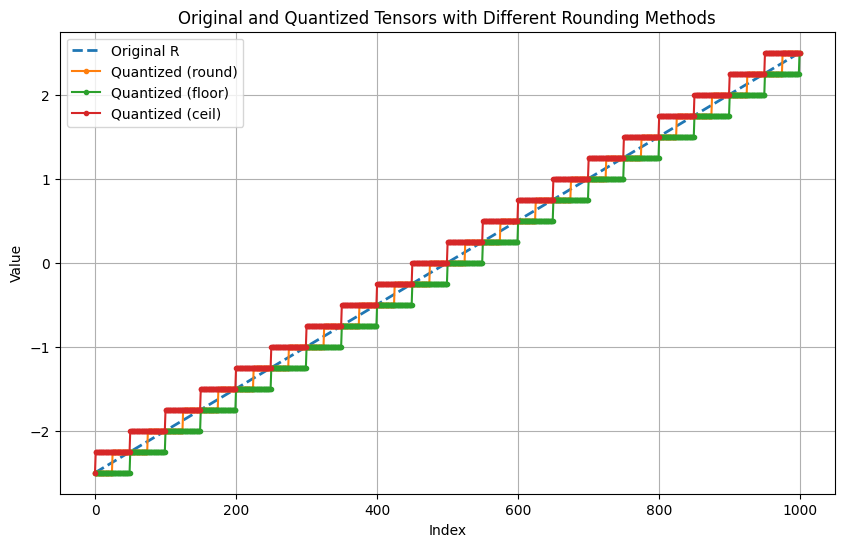

In [11]:
import matplotlib.pyplot as plt

R = torch.linspace(-2.5, 2.5, 1000)

bit_width = 4
fraction_bits = 2
round_methods = ["round", "floor", "ceil"]

quantized_tensors = []

for round_method in round_methods:
    quantized = signed_fixed_point_quantize(R, bit_width, fraction_bits, round_method)
    quantized_tensors.append(quantized)

plt.figure(figsize=(10, 6))
plt.plot(R.numpy(), label="Original R", linestyle="--", linewidth=2)
for i, round_method in enumerate(round_methods):
    plt.plot(quantized_tensors[i].numpy(), label=f"Quantized ({round_method})", marker='o', markersize=3)

plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Original and Quantized Tensors with Different Rounding Methods")
plt.grid(True)
plt.show()


(Extention exercise) Apply quantization on image `mandrill.jpg`.

Use opencv function `imread` to read image with arguments: path_to_file and value 0 (as second arg).

Function returns numpy ndarray. Convert it to torch.Tensor and divide by 255 (normalization).

Display image with `plt.imshow`.

Apply signed quantization of 4 bits, 3 bits of precision and 'floor' rounding.

Plot resultant image.


tensor([[0.5000, 0.0000, 0.0000,  ..., 0.2500, 0.5000, 0.5000],
        [0.2500, 0.2500, 0.0000,  ..., 0.5000, 0.5000, 0.2500],
        [0.2500, 0.2500, 0.0000,  ..., 0.2500, 0.2500, 0.2500],
        ...,
        [0.5000, 0.5000, 0.5000,  ..., 0.2500, 0.2500, 0.2500],
        [0.5000, 0.5000, 0.5000,  ..., 0.2500, 0.2500, 0.2500],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


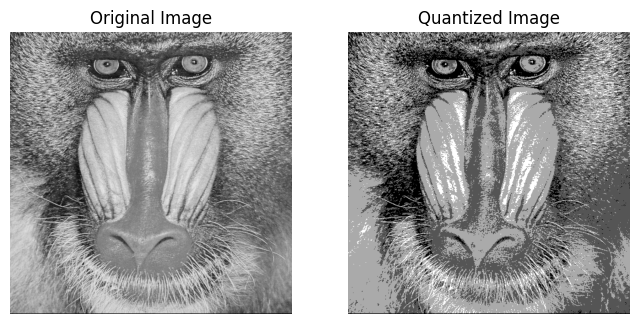

In [14]:
import cv2

path_to_file = 'mandrill.jpg'
image = cv2.imread(path_to_file, 0)

image_tensor = torch.tensor(image) / 255.0

bit_width = 4
precision_bits = 2
round_method = "floor"

fraction_bits = bit_width - precision_bits
scale_factor = 2 ** fraction_bits

quantized_image = torch.floor(image_tensor * scale_factor) / scale_factor
print(quantized_image)

plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(image_tensor, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(quantized_image, cmap='gray')
plt.title("Quantized Image")
plt.axis('off')

plt.show()


Before we finish, let's consider the case, where we want represent real values with totally different set of numbers.

Create a tensor `R4` with 500 values from linear space of range -2.5 to 0 and 500 values from linear space of range 0 to
10 (you'll need `tensor.cat` function).

Let's represent this tensor with integers in range of 0-15. To do that you use following functions:

$Q(R) = floor(R/S + Z)$

where

- `S` is simply ratio of the input range to the output range
- `Z` is `zero-point` to ensure that the smallest value in input space maps perfectly to smallest value in quantized
  space

$S = R_{max}-R_{min} / Q_{max}-Q_{min}$

$Z = -(R_{min}/S - Q_{min})$


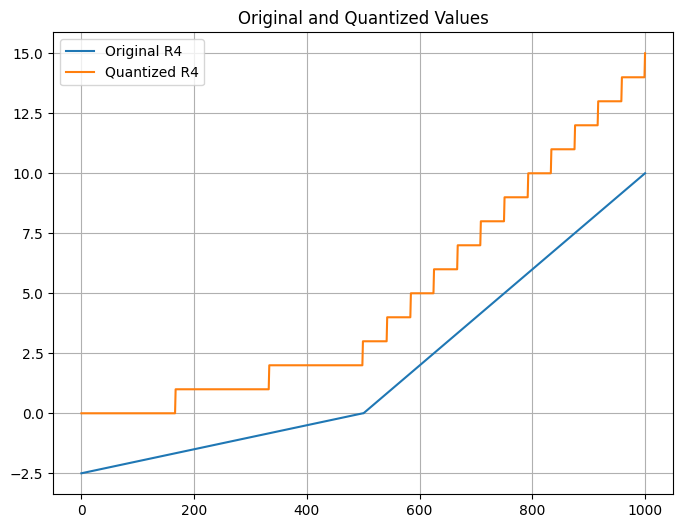

In [13]:
R_temp1 = torch.linspace(-2.5, 0, 500)
R_temp2 = torch.linspace(0, 10, 500)
R4 = torch.cat((R_temp1, R_temp2))

R_min = R4.min().item()
R_max = R4.max().item()
Q_min = 0
Q_max = 15

S = (R_max - R_min) / (Q_max - Q_min)
Z = -(R_min / S - Q_min)

Q = torch.floor(R4 / S + Z)

R_ref = torch.linspace(0, 1000, 1000)

plt.figure(figsize=(8, 6))
plt.plot(R_ref, R4, label="Original R4")
plt.plot(R_ref, Q, label="Quantized R4")
plt.title("Original and Quantized Values")
plt.legend()
plt.grid()
plt.show()
